# Pair programming Estadística Descriptiva

Eres un analista de datos que trabaja para una organización internacional que se enfoca en el desarrollo y el bienestar de los países. Tu objetivo es realizar un análisis inicial de estadísticas descriptivas sobre varios países utilizando el conjunto de datos proporcionado en world_data_sin_nulos.csv

Objetivo: Realizar un análisis de estadísticas descriptivas para comprender mejor la situación de los países en términos de diversos indicadores.

In [87]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None) # para poder visualizar todas las filas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [88]:
# lo primero que hacemos es cargar el dataframe que vamos a usar
df = pd.read_csv("world_data_sin_nulos.csv", index_col = 0)
df.head()

,country,density,abbreviation,agriculturalland,landarea,birthrate,callingcode,capital/majorcity,co2-emissions,currency-code,fertilityrate,forestedarea,gdp,grossprimaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,urban_population,latitude,longitude,continent,armedforcessize,cpi,cpichange,gasolineprice,grosstertiaryeducationenrollment,maternalmortalityratio,minimumwage,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate
0,Afghanistan,60.0,AF,58.1,652230.0,32.49,93.0,Kabul,8672.0,AFN,4.47,2.1,1.910135e+10,104.0,47.9,Kabul,64.5,Pashto,78.4,0.28,38041754.0,9797273.0,33.939110,67.709953,Asia,323000.0,149.900,2.30,0.70,9.70,638.0,0.43,48.90,9.30,71.40,11.120
1,Albania,105.0,AL,43.1,28748.0,11.78,355.0,Tirana,4536.0,ALL,1.62,28.1,1.527808e+10,107.0,7.8,Tirana,78.5,Albanian,56.9,1.20,2854191.0,1747593.0,41.153332,20.168331,Europe,9000.0,119.050,1.40,1.36,55.00,15.0,1.12,55.70,18.60,36.60,12.330
2,Algeria,18.0,DZ,17.4,2381741.0,24.28,213.0,Algiers,150006.0,DZD,3.02,0.8,1.699882e+11,109.9,20.1,Algiers,76.7,Arabic,28.1,1.72,43053054.0,31510100.0,28.033886,1.659626,Africa,317000.0,151.360,2.00,0.28,51.40,112.0,0.95,41.20,37.20,66.10,11.700
3,Andorra,164.0,AD,40.0,468.0,7.20,376.0,Andorra la Vella,469.0,EUR,1.27,34.0,3.154058e+09,106.4,2.7,Andorra la Vella,73.2,Catalan,36.4,3.33,77142.0,67873.0,42.506285,1.521801,Europe,22200.0,108.672,0.92,1.51,59.58,169.0,6.63,60.32,18.24,39.48,6.782
4,Angola,26.0,AO,47.5,1246700.0,40.73,244.0,Luanda,34693.0,AOA,5.52,46.3,9.463542e+10,113.5,51.6,Luanda,60.8,Portuguese,33.4,0.21,31825295.0,21061025.0,-11.202692,17.873887,Africa,117000.0,261.730,17.10,0.97,9.30,241.0,0.71,77.50,9.20,49.10,6.890


### 1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:
 - Media
 - Mediana
 - Desviación estándar
 - Mínimo
 - Máximo

In [89]:
# Calcula estadísticas descriptivas para variables numéricas en el DataFrame
estadisticas_descriptivas = df.describe()

# Muestra el resumen estadístico
print(estadisticas_descriptivas)

            density  agriculturalland      landarea   birthrate  callingcode  \
count    195.000000        195.000000  1.950000e+02  195.000000   195.000000   
mean     356.764103         39.134872  6.867007e+05   20.145282   360.007692   
std     1982.888967         21.386637  1.917085e+06    9.798615   322.490008   
min        2.000000          0.600000  0.000000e+00    5.900000     1.000000   
25%       35.500000         22.650000  2.445650e+04   11.450000    83.000000   
50%       89.000000         39.600000  1.195110e+05   17.950000   255.500000   
75%      216.500000         54.850000  5.205440e+05   28.445000   506.500000   
max    26337.000000         82.600000  1.709824e+07   46.080000  1876.000000   

       co2-emissions  fertilityrate  forestedarea           gdp  \
count   1.950000e+02     195.000000    195.000000  1.950000e+02   
mean    1.718583e+05       2.681872     32.014872  4.727532e+11   
std     8.240967e+05       1.261755     23.358162  2.161411e+12   
min     1.1

### 2.Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [90]:
# Identificar el país con la mayor densidad de población
pais_mayor_densidad = df.loc[df['density'].idxmax()]['country']

# Identificar el país con la menor población
pais_menor_poblacion = df.loc[df['population'].idxmin()]['country']

# Imprimir los resultados
print(f"País con la mayor densidad de población: {pais_mayor_densidad}")
print(f"País con la menor población: {pais_menor_poblacion}")

País con la mayor densidad de población: Monaco
País con la menor población: Vatican City


### 3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [91]:
# Calcula la tasa promedio de natalidad
tasa_promedio_natalidad = round(df['birthrate'].mean(),2)

# Imprime el resultado
print(f"La tasa promedio de natalidad para todos los países en el conjunto de datos es: {tasa_promedio_natalidad}")
print(' '*50)
print('-'*50)
print(' '*50)
# Si quisiéramos calcular la tasa promedio de natalidad PARA CADA país:

# Calcula la tasa promedio de natalidad para cada país
tasa_promedio_por_pais = df.groupby('country')['birthrate'].mean()

# Muestra las tasas promedio de natalidad por país
print(tasa_promedio_por_pais)

La tasa promedio de natalidad para todos los países en el conjunto de datos es: 20.15
                                                  
--------------------------------------------------
                                                  
country
Afghanistan                         32.49
Albania                             11.78
Algeria                             24.28
Andorra                              7.20
Angola                              40.73
Antigua and Barbuda                 15.33
Argentina                           17.02
Armenia                             13.99
Australia                           12.60
Austria                              9.70
Azerbaijan                          14.00
Bahrain                             13.99
Bangladesh                          18.18
Barbados                            10.65
Belarus                              9.90
Belgium                             10.30
Belize                              20.79
Benin                               36.

### 4.Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

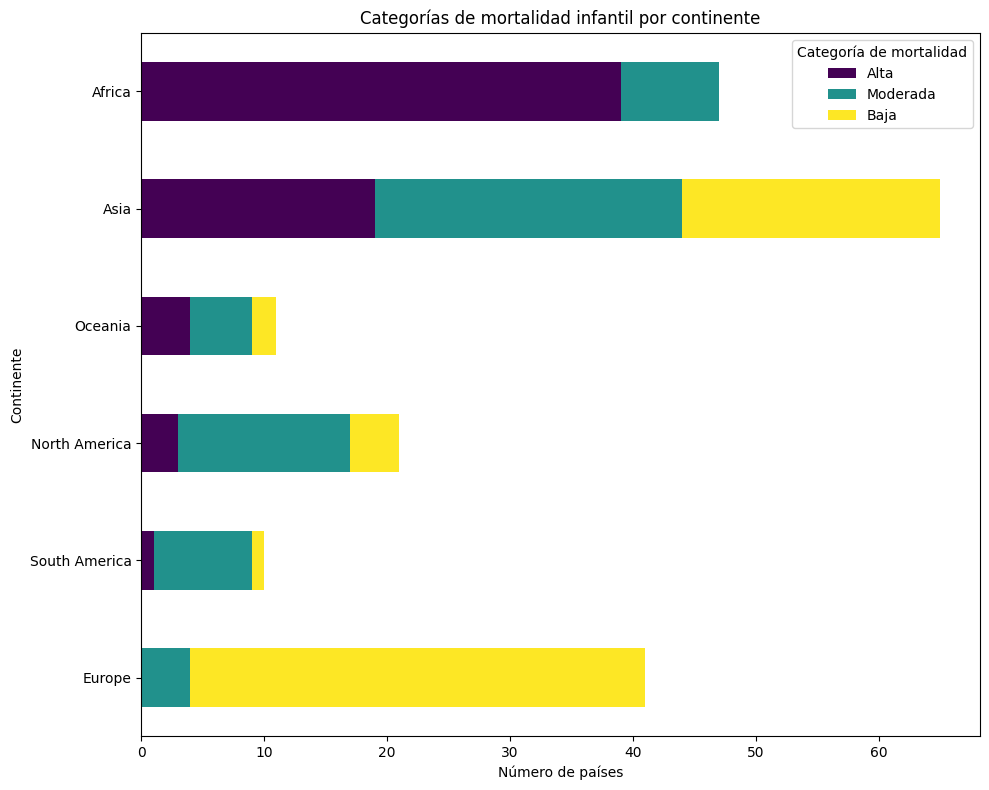

In [92]:
# Calcular cuantiles
terciles = df['infantmortality'].quantile([0.33, 0.66])

# Función para asignar categorías
def categorizar_mortalidad(valor):
    if valor <= terciles[0.33]:
        return 'baja'
    elif valor <= terciles[0.66]:
        return 'moderada'
    else:
        return 'alta'

# Aplicar la función para crear una nueva columna 'categoria_mortalidad'
df['categoria_mortalidad'] = df['infantmortality'].apply(categorizar_mortalidad)
# Contar el número de países con mortalidad infantil por continente y categoría
counts = df.groupby(['continent', 'categoria_mortalidad']).size().unstack(fill_value=0)
counts = counts.reindex(columns=['alta', 'moderada', 'baja'])

# Ordenar por el número de países con mortalidad infantil alta de mayor a menor
counts = counts.sort_values(by='alta', ascending=True)

# Cambiar el orden de las columnas para que la alta sea primero
counts = counts[['alta', 'moderada', 'baja']]

# Crear un gráfico de barras apiladas horizontal
ax = counts.plot(kind='barh', stacked=True, figsize=(10, 8), colormap='viridis')

# Configuración de título y etiquetas
plt.title('Categorías de mortalidad infantil por continente')
plt.xlabel('Número de países')
plt.ylabel('Continente')

# Mostrar el gráfico
plt.tight_layout()
plt.legend(['Alta', 'Moderada', 'Baja'], title='Categoría de mortalidad', loc='upper right')
plt.show()


Del gráfico se desprende que África es el Continente con mayor número de países con alta mortalidad infantil, en contraposición con Europa donde no hay países con mortalidad infantil alta.

También se observa que Europa es el país con mayor número de países con mortalidad infantil baja.

Para más detalle hemos creado una tabla con estos datos pormenorizados por país y su clasificación alta/media/baja.

In [93]:
# Muestra el DataFrame con las nuevas columnas
df[['continent', 'country', 'categoria_mortalidad']]


,continent,country,categoria_mortalidad
0,Asia,Afghanistan,alta
1,Europe,Albania,baja
2,Africa,Algeria,moderada
3,Europe,Andorra,baja
4,Africa,Angola,alta
5,North America,Antigua and Barbuda,baja
6,South America,Argentina,moderada
7,Asia,Armenia,moderada
8,Oceania,Australia,baja
9,Europe,Austria,baja


### 5.Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". 
Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [94]:
correlation = round(df[['fertilityrate', 'lifeexpectancy']].corr(),2)
print(correlation)

                fertilityrate  lifeexpectancy
fertilityrate            1.00           -0.85
lifeexpectancy          -0.85            1.00


En el resultado de la matriz de correlación, el valor de la intersección de las dos variables es el coeficiente de correlación entre esas dos variables. 

Este valor de la correlación entre las variables fertilityrate y lifeexpectancy es de **-0.85**, lo que implica que **a medida que la tasa de fertilidad aumenta, la esperanza de vida disminuye**, y viceversa.

En términos generales, la relación entre la tasa de fertilidad y la esperanza de vida puede variar dependiendo de diferentes factores sociodemográficos, económicos y de salud en una población específica.

### 6.Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución ~~de los índices de percepción de corrupción~~.

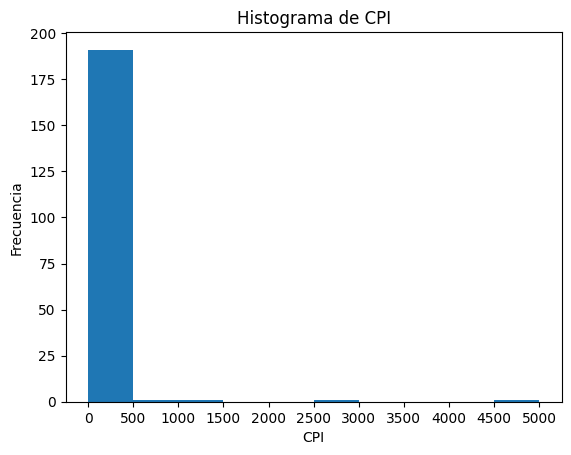

In [95]:
# Obtener los límites para el eje x
cpi_max = df['cpi'].max()
x_max = int(np.ceil(cpi_max / 500)) * 500  # Redondear al próximo múltiplo de 500

# Definir límites del eje x y ancho de los bins
bins = range(0, x_max + 500, 500)

# Visualizar el histograma con los límites y ancho de bins personalizados
plt.hist(df['cpi'], bins=bins)
plt.xlabel('CPI')
plt.ylabel('Frecuencia')
plt.title('Histograma de CPI')

# Configurar los ticks del eje x en unidades de 500
plt.xticks(np.arange(0, x_max + 1, 500))

plt.show()


Según el histograma de la distribución de la variable "CPI", se identifica que la concentración de valores se concentra principalmente entre algo menos de 100 y aproximadamente 550 (números aproximados según visualización). 

Verificamos con cálculos estadísticos:

In [96]:
# Calcular la distribución de la columna CPI en intervalos
cpi_distribution = df['cpi'].value_counts(bins=10, sort=False)
print(cpi_distribution)

(94.544, 547.498]       191
(547.498, 995.966]        1
(995.966, 1444.434]       1
(1444.434, 1892.902]      0
(1892.902, 2341.37]       0
(2341.37, 2789.838]       1
(2789.838, 3238.306]      0
(3238.306, 3686.774]      0
(3686.774, 4135.242]      0
(4135.242, 4583.71]       1
Name: count, dtype: int64


El rango con mayor distribución de datos está entre los *94.544* < CPI =< *547.498*

### 7.Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

In [97]:
# Encuentra el país con la mayor diferencia entre el GDP y CO2 emissions
max_difference_country = df.loc[(df['gdp'] - df['co2-emissions']).idxmax()]['country']

print(f"El país con la mayor diferencia entre GDP y CO2 emissions es: {max_difference_country}")


El país con la mayor diferencia entre GDP y CO2 emissions es: United States


### 8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.

In [98]:
# Calcular el porcentaje promedio de participación en la fuerza laboral para todos los países
promedio_participacion_laboral = df['populationlaborforceparticipation'].mean()

print(f"El porcentaje promedio de participación en la fuerza laboral para todos los países es: {promedio_participacion_laboral:.2f}%")


El porcentaje promedio de participación en la fuerza laboral para todos los países es: 62.69%


In [104]:
# Si quisiéramos calcularlo para cada país sería:

promedio_participacion_por_pais = df.groupby('country')['populationlaborforceparticipation'].mean()

for country, percentage in promedio_participacion_por_pais.items():
    print(f"País: {country}, Porcentaje promedio de participación en la fuerza laboral: {percentage:.2f}%")

País: Afghanistan, Porcentaje promedio de participación en la fuerza laboral: 48.90%
País: Albania, Porcentaje promedio de participación en la fuerza laboral: 55.70%
País: Algeria, Porcentaje promedio de participación en la fuerza laboral: 41.20%
País: Andorra, Porcentaje promedio de participación en la fuerza laboral: 60.32%
País: Angola, Porcentaje promedio de participación en la fuerza laboral: 77.50%
País: Antigua and Barbuda, Porcentaje promedio de participación en la fuerza laboral: 57.80%
País: Argentina, Porcentaje promedio de participación en la fuerza laboral: 61.30%
País: Armenia, Porcentaje promedio de participación en la fuerza laboral: 55.60%
País: Australia, Porcentaje promedio de participación en la fuerza laboral: 65.50%
País: Austria, Porcentaje promedio de participación en la fuerza laboral: 60.70%
País: Azerbaijan, Porcentaje promedio de participación en la fuerza laboral: 66.50%
País: Bahrain, Porcentaje promedio de participación en la fuerza laboral: 73.40%
País: 

### 9.Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.

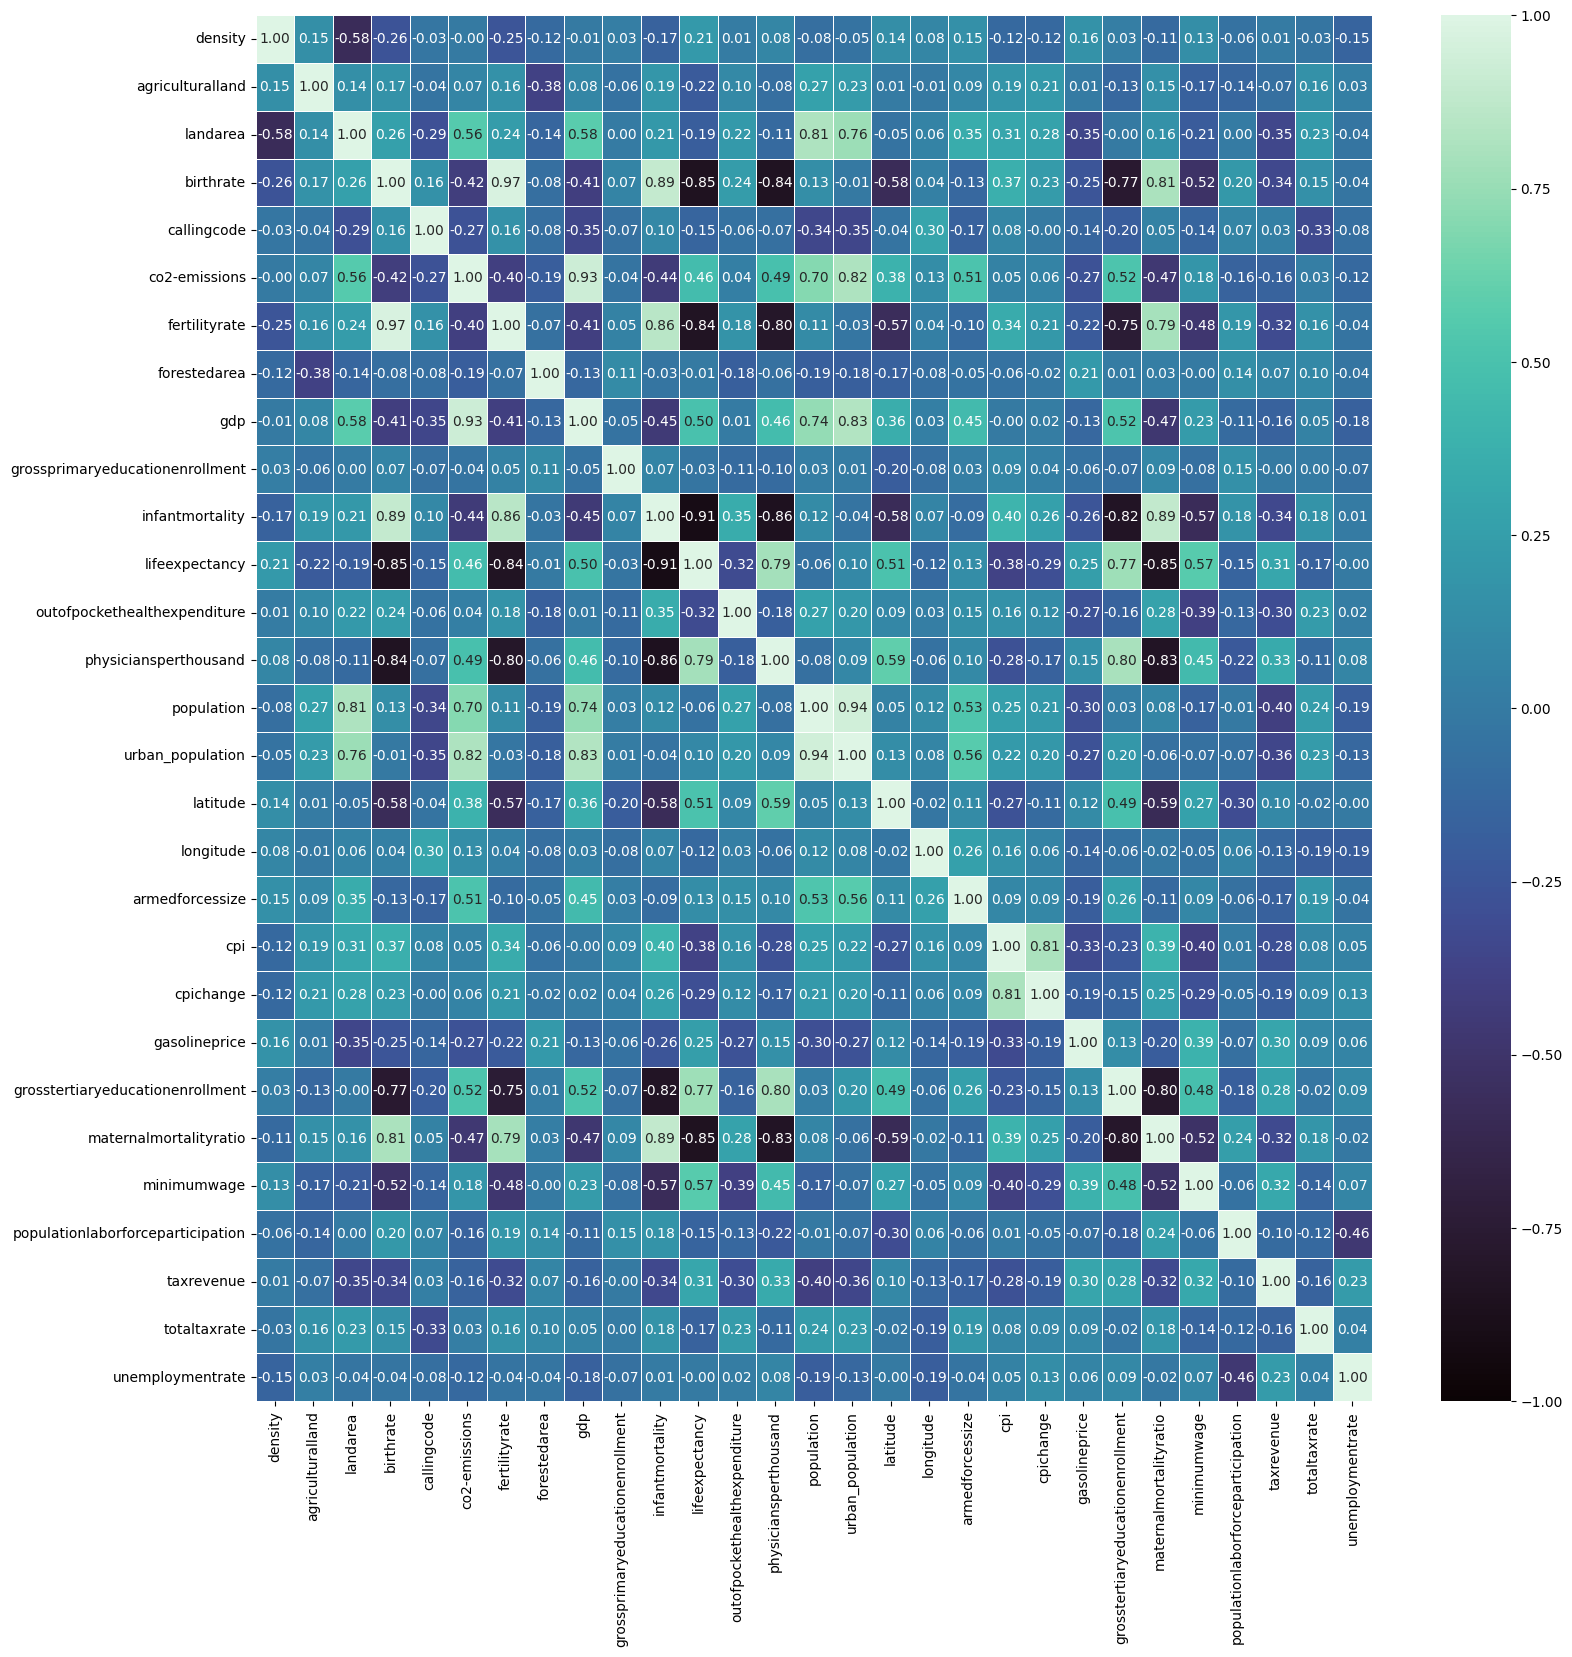

In [107]:
# como todas las parejas de variables tienen relaciones no lineales, aplicaremos la correlación de Spearman a todo el DataFrame
df_correlaciones = df.corr(numeric_only = True, method = "spearman")

# establecemos el tamaño de la gráfica
plt.figure(figsize = (18, 18))

# convertimos nuestra matriz de correlación a una gráfica
sns.heatmap(df_correlaciones, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "mako", # para establecer el color de la gráfica
            linewidths=0.5, # para que haya una pequeña separación entre cada una de las celdas
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1); # para identificar el valor mínimo de nuestra escala de colores

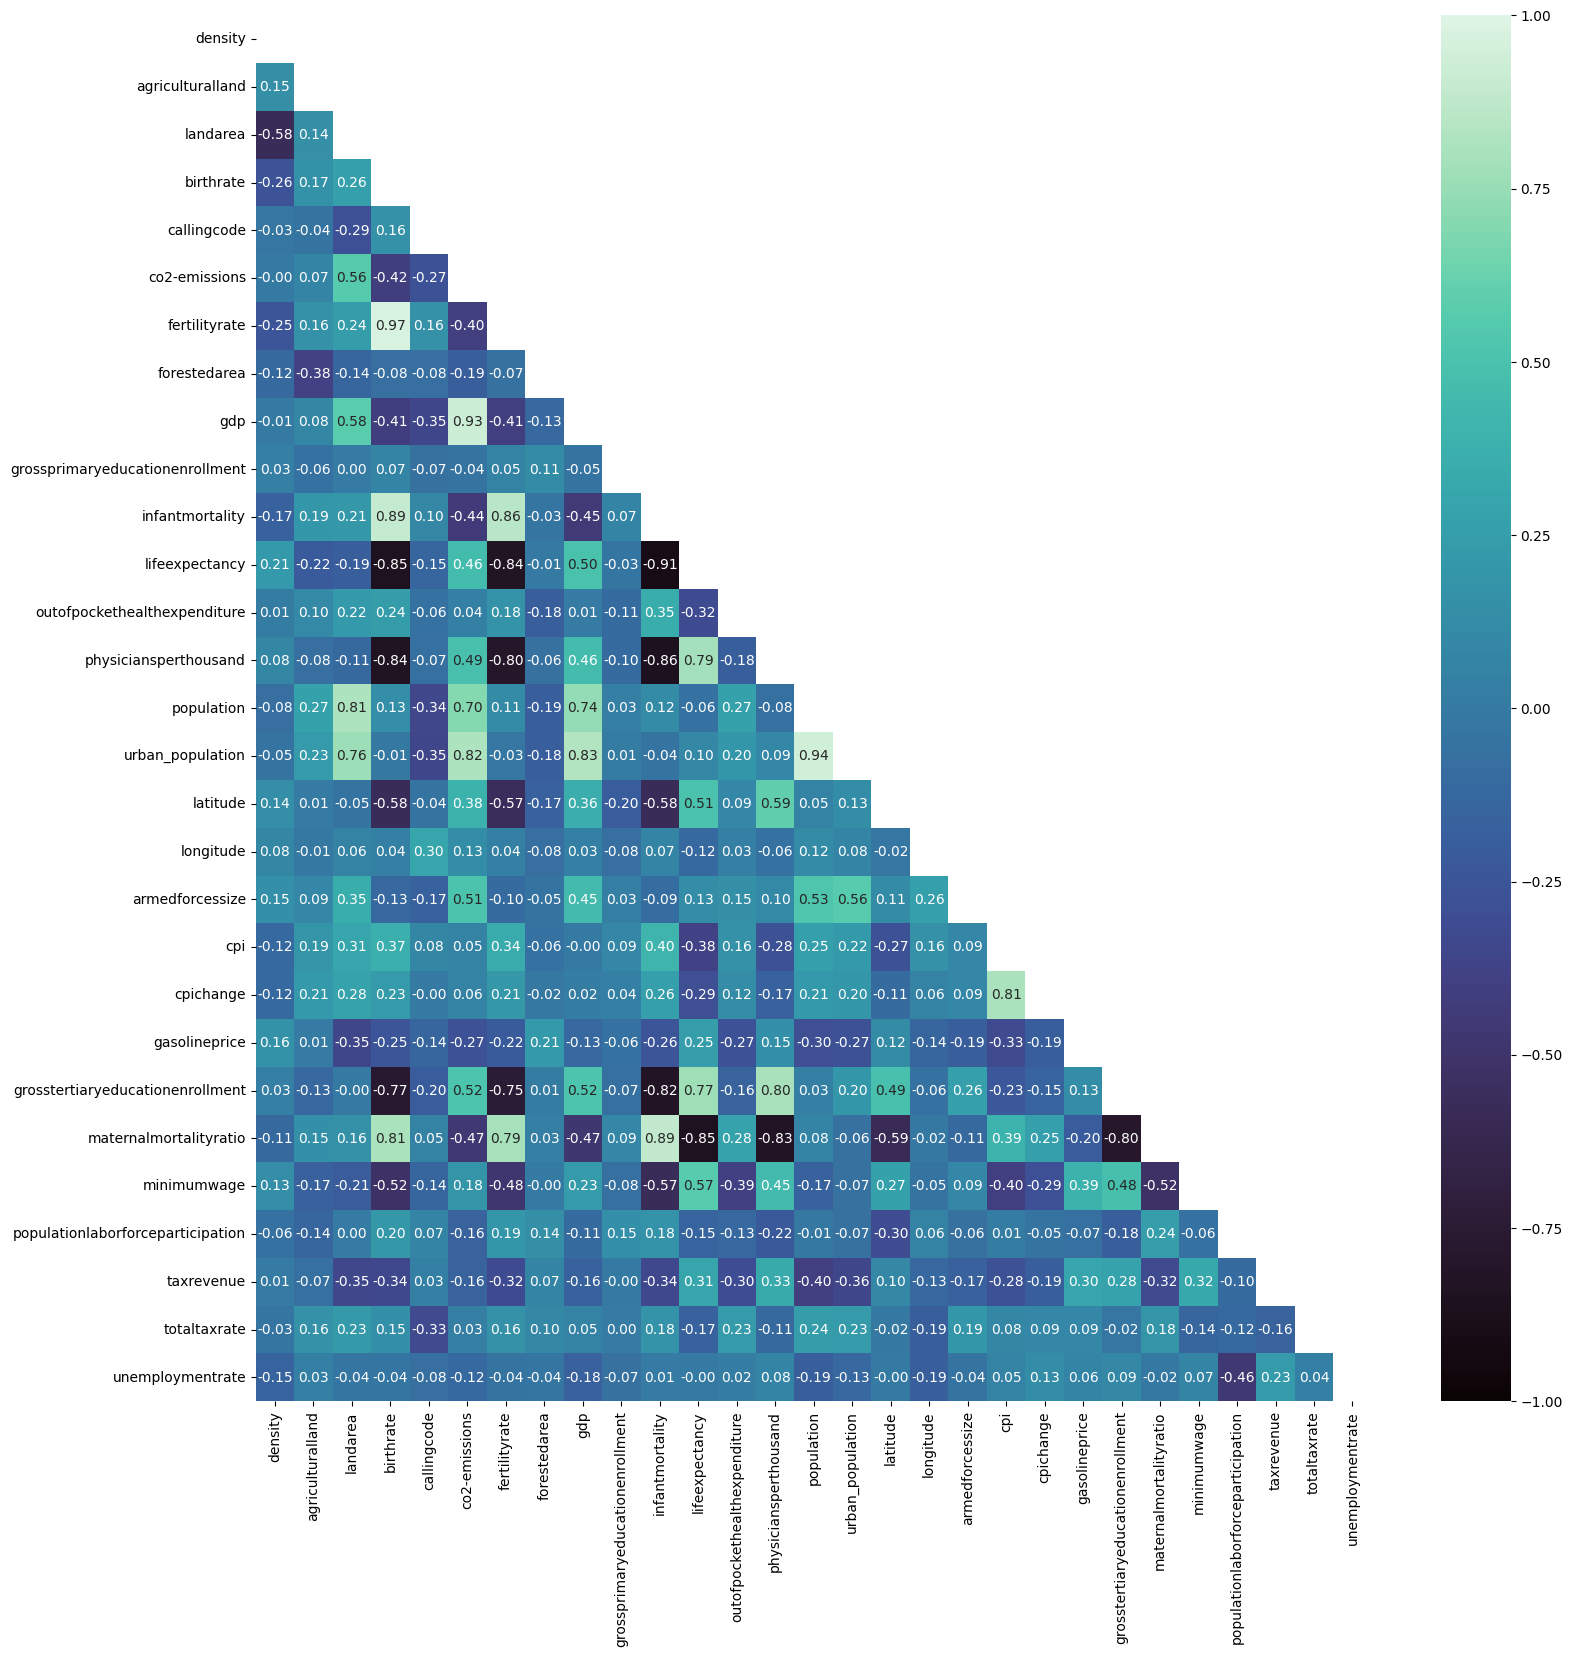

In [106]:
# para mejorar la visualización, eliminamos la diagonal y los valores superiores que son espejo de los inferiores a la diagonal

# establecemos el tamaño de la gráfica
plt.figure(figsize = (18, 18))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

Las relaciones más perfectas se muestran en los colores más claros (valor = 1) y más oscuros (valor = -1).

In [125]:
# Vamos a imprimir los resultados de las variables de correlación alta.

# Filtrar las correlaciones mayores o iguales a 0.7 en valor absoluto
high_corr = df_correlaciones[(df_correlaciones.abs() >= 0.7) & (df_correlaciones != 1)]

# las ordenarlas de mayor a menor
high_corr_sorted = high_corr.abs().stack().sort_values(ascending=False)

# Iterar sobre las correlaciones ordenadas y mostrar solo los valores con índice impar (para que no salgan las relaciones duplicadas)
print("Los pares de variables numéricas con alta correlación son:\n")
contador = 0

for idx, val in high_corr_sorted.items():
    if contador % 2 != 0:
        print(f"'{idx[0]}' y '{idx[1]}' con valor de correlación: {val * 100:.2f}%\n")
    contador += 1


Los pares de variables numéricas con alta correlación son:

'fertilityrate' y 'birthrate' con valor de correlación: 97.36%

'population' y 'urban_population' con valor de correlación: 93.92%

'gdp' y 'co2-emissions' con valor de correlación: 92.85%

'lifeexpectancy' y 'infantmortality' con valor de correlación: 90.75%

'birthrate' y 'infantmortality' con valor de correlación: 89.06%

'maternalmortalityratio' y 'infantmortality' con valor de correlación: 88.83%

'infantmortality' y 'physiciansperthousand' con valor de correlación: 85.93%

'infantmortality' y 'fertilityrate' con valor de correlación: 85.70%

'maternalmortalityratio' y 'lifeexpectancy' con valor de correlación: 84.99%

'birthrate' y 'lifeexpectancy' con valor de correlación: 84.55%

'birthrate' y 'physiciansperthousand' con valor de correlación: 83.66%

'fertilityrate' y 'lifeexpectancy' con valor de correlación: 83.54%

'gdp' y 'urban_population' con valor de correlación: 83.27%

'physiciansperthousand' y 'maternalmortal